# Clustering

<b> Overview </b>
- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense or another) to each other than to those in other groups (clusters). 

- Primarily used for exploratory data analysis and business applications like customer segmentation, product segmentation, market segmentation.

----
In this class we will explore a cluster technique called k-means & DBSCAN and understand how they works.

- Introduction to k-means() clustering
- Scaling of data before cluster analysis
- Dendogram to find out optimal number of clusters
- DBSCAN clustering

---
Can a clustering algorithm group them together by how nearer they are to each other?¶

Using K-means clustering technique
- k-mean calculates the distance between the points and the center using euclidean distance and then allocates the points to different clusters.

This dataset contains sample of beer brands and analyzes to understand the type of beer the is manufactured and what kind of market is targets. This gives an insight into different segments of market and presence of different beers in different segments.

Attribute Description:
- name - the beer brand
- calories - calories per ounce
- sodium
- alcohol - alcohol percentage present
- cost - in dollars

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sn
%matplotlib inline

In [2]:
# beer dataset
beer = pd.read_csv('beer.txt', sep=' ')
beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


How would you cluster these beers?

In [3]:
# define X
X = beer.drop('name', axis=1)

What happened to y?

## Part 1: K-means clustering

In [4]:
from sklearn.cluster import KMeans

In [5]:
KMeans?

In [6]:
# K-means with 3 clusters
km = KMeans(n_clusters=3, random_state=1)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [84]:
km.inertia_

2427.5071642857142

In [7]:
# review the cluster labels
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1])

In [11]:
# save the cluster labels and sort by cluster
beer['cluster3'] = km.labels_
beer.sort_values('cluster3')

,name,calories,sodium,alcohol,cost,cluster3
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
2,Lowenbrau,157,15,0.9,0.48,0
3,Kronenbourg,170,7,5.2,0.73,0
4,Heineken,152,11,5.0,0.77,0
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0
16,Hamms,139,19,4.4,0.43,0


In [10]:
beer.

,name,calories,sodium,alcohol,cost,cluster3
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
2,Lowenbrau,157,15,0.9,0.48,0
3,Kronenbourg,170,7,5.2,0.73,0
4,Heineken,152,11,5.0,0.77,0


What do the clusters seem to be based on? Why?

In [12]:
# review the cluster centers
km.cluster_centers_

array([[ 150.        ,   17.        ,    4.52142857,    0.52071429],
       [ 102.75      ,   10.        ,    4.075     ,    0.44      ],
       [  70.        ,   10.5       ,    2.6       ,    0.42      ]])

In [13]:
# calculate the mean of each feature for each cluster
beer.groupby('cluster3').mean()

,calories,sodium,alcohol,cost
cluster3,,,,
0,150.00,17.0,4.521429,0.520714
1,102.75,10.0,4.075000,0.440000
2,70.00,10.5,2.600000,0.420000


In [21]:
# save the DataFrame of cluster centers
centers = beer.groupby('cluster3').mean()

In [18]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

In [19]:
# create a "colors" array for plotting
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])

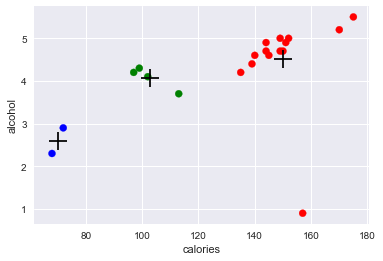

In [22]:
# scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue)
plt.scatter(beer.calories, beer.alcohol, c=colors[beer.cluster3], s=50)

# cluster centers, marked by "+"
plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=300, c='black')

# add labels
plt.xlabel('calories')
plt.ylabel('alcohol')

C:\Users\pd147\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C9E9C88>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000CF6DEB8>]], dtype=object)

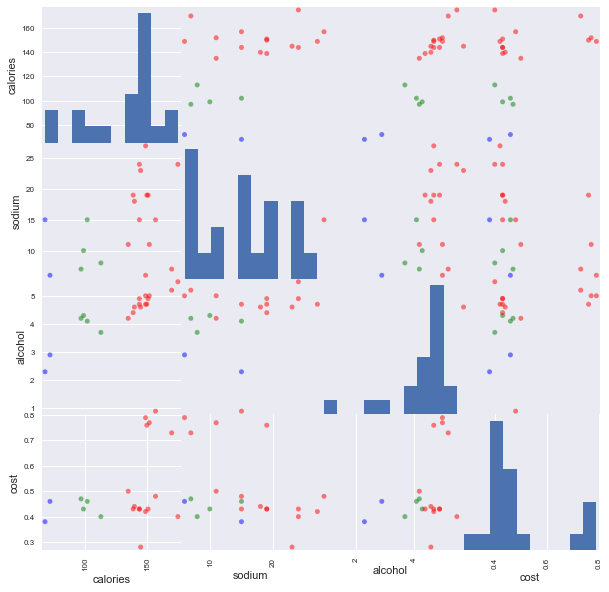

In [23]:
# scatter plot matrix (0=red, 1=green, 2=blue)
pd.scatter_matrix(X, c=colors[beer.cluster3], figsize=(10,10), s=100)

It can be observed that the segments are mostly based on calories. High, medium and low calories. This is because scale of calogies is larger than the scale of other parameters. So, we need to scale all parameters and then cluster it.

### Repeat with scaled data

In [24]:
# center and scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
pd.DataFrame(X_scaled).describe()

,0,1,2,3
count,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01
mean,-3.219647e-16,7.771561e-17,-1.003711e-15,-3.608225e-16
std,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00
min,-2.186883e+00,-1.395248e+00,-3.149822e+00,-1.519224e+00
25%,-7.554993e-01,-8.496201e-01,-6.129894e-02,-4.745363e-01
50%,3.879133e-01,7.794680e-03,3.395018e-01,-4.214165e-01
75%,5.996564e-01,6.313691e-01,6.224200e-01,-6.728499e-02
max,1.438159e+00,1.878518e+00,1.188256e+00,2.092917e+00


In [26]:
# K-means with 3 clusters on scaled data
km = KMeans(n_clusters=3, random_state=1)
km.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [28]:
# save the cluster labels and sort by cluster
beer['cluster_3_a'] = km.labels_
beer.sort_values('cluster_3_a')

,name,calories,sodium,alcohol,cost,cluster3,cluster_3_a
0,Budweiser,144,15,4.7,0.43,0,0
1,Schlitz,151,19,4.9,0.43,0,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0,0
16,Hamms,139,19,4.4,0.43,0,0
5,Old_Milwaukee,145,23,4.6,0.28,0,0
6,Augsberger,175,24,5.5,0.40,0,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,0
10,Coors,140,18,4.6,0.44,0,0
15,Pabst_Extra_Light,68,15,2.3,0.38,2,1
12,Michelob_Light,135,11,4.2,0.50,0,1


What are the "characteristics" of each cluster?

In [29]:
# review the cluster centers
beer.groupby('cluster_3_a').mean()

,calories,sodium,alcohol,cost,cluster3
cluster_3_a,,,,,
0,148.375,21.125,4.7875,0.4075,0
1,105.375,10.875,3.3250,0.4475,1
2,155.250,10.750,4.9750,0.7625,0


C:\Users\pd147\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D458B38>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D986D30>]], dtype=object)

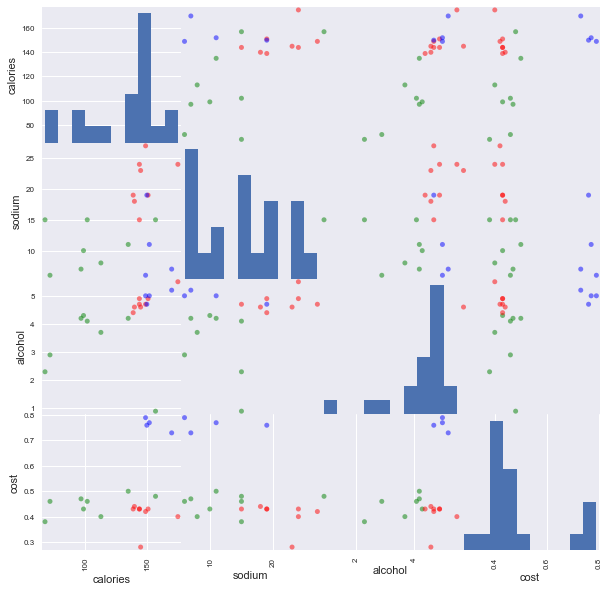

In [30]:
# scatter plot matrix of new cluster assignments (0=red, 1=green, 2=blue)
pd.scatter_matrix(X, c=colors[beer.cluster_3_a], figsize=(10,10), s=100)

Do you notice any cluster assignments that seem a bit odd? How might we explain those?

Even now the clusters are not very distinct. The clusters are mostly based on calories and alcohol percentage. This may be because we are looking for wrong number of clusters.

## Part 2: Clustering evaluation (Finding optimal number of clusters)

This explains how to find optimal number of clusters in a given dataset by using various techniques.
Different techniques discussed here are
- Dendogram
- Elbow method
- Silhoutte score Analysis
We will first load the data into dataframe and scale the features and create clusters. And then various metrics are calculated to validate the number of cluster creations and what will be the optimal number of clusters.

---
The [Silhouette Coefficient](http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient) is a common metric for evaluating clustering "performance" in situations when the "true" cluster assignments are not known.

A Silhouette Coefficient is calculated for **each observation**:

$$SC = \frac{b-a} {max(a, b)}$$

- a = mean distance to all other points in **its cluster**
- b = mean distance to all other points in **the next nearest cluster**

It ranges from -1 (worst) to 1 (best). A **global score** is calculated by taking the mean score for all observations.

---
- The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
- The silhouette ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
- If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.
- The silhouette can be calculated with any distance metric, such as the Euclidean distance or the Manhattan distance.

# Using Dendogram

- Dendogram shows the distance between any two observations in a dataset. The vertical axis determines the distance. The longer the axis, the larger the distance.
- The clustermap feature in seaborn provides the dendogram. It also displays the distance between observations as well as the features. But we are mostly interested in observations.

C:\Anaconda2\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


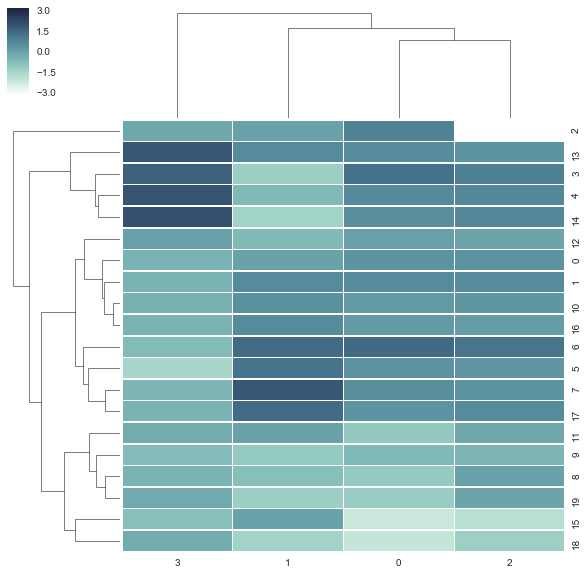

In [24]:
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
g = sn.clustermap(X_scaled, cmap=cmap, linewidths=.5)

<b> Note: </b>

- From the diagram it can observed that the number of clusters or groups of observations present are between 3 to 6. Based on business context the number of clusters can be created.

- The dendogram shows there are 5 disctinct clusters. Or we can consolidate them into 4 clusters. Too many segments may be harder to interpret, so we will stick to 4 segments here.

# Elbow Analysis

- The Elbow method is a method of interpretation and validation of consistency within cluster analysis designed to help finding the appropriate number of clusters in a dataset.
- Explained Variance: This method looks at the percentage of variance explained as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data.
- if one plots the percentage of variance explained by the clusters against the number of clusters the first clusters will add much information (explain a lot of variance), but at some point the marginal gain in explained variance will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the "elbow criterion"
- Given a set of observations (x1, x2, …, xn), where each observation is a d-dimensional real vector, k-means clustering aims to partition the n observations into k (≤ n) sets S = {S1, S2, …, Sk} so as to minimize the within-cluster sum of squares (WCSS) (sum of distance functions of each point in the cluster to the K center).
-In other words, its objective is to find:
argminS∑i=1k∑x∈Si∥x−μi∥2

 

In [39]:
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X_scaled )
  cluster_errors.append( clusters.inertia_ )

In [40]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [41]:
clusters_df[0:10]

,cluster_errors,num_clusters
0,80.000000,1
1,51.459153,2
2,27.849901,3
3,17.843595,4
4,12.388815,5
5,9.570665,6
6,7.232908,7
7,5.918853,8
8,4.788812,9
9,3.644205,10


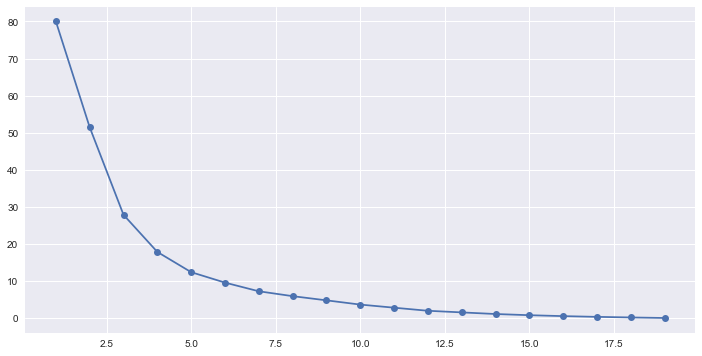

In [42]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

# Note:
- The elbow diagram shows that the gain in explained variance reduces significantly from 3 to 4 to 5. So, optimal number of clusters could either 4 or 5. 
- The actual number of clusters chosen can be finally based on business context and convenience of dealing with number of segments or clusters.